In [74]:
import cv2
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

In [75]:
#이미지분석하는 학습모델
resnet50=tf.keras.applications.resnet.ResNet50(
    weights='imagenet', input_shape=(224, 224, 3)
)

In [76]:
#분류할 이미지 사이즈와 형태 변경
file = '../data/dog2.png'
image = np.array(Image.open(file))
image_resize = cv2.resize(image, (224,224))
image_reshape = image_resize.reshape([1, 224, 224, 3])

In [77]:
#이미지 분류 예측
pred=resnet50.predict(image_reshape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


In [78]:
pred

array([[7.66019753e-07, 3.75248561e-07, 9.36863580e-06, 5.58023248e-06,
        1.04077604e-04, 1.35186683e-05, 5.73350917e-07, 3.36870187e-07,
        6.95352611e-08, 2.61280331e-09, 9.59712878e-08, 1.41340353e-08,
        6.54094734e-08, 8.48575894e-08, 2.01978541e-08, 4.67230275e-05,
        3.60969648e-06, 1.05859372e-05, 3.01132923e-06, 1.83642435e-08,
        1.59420281e-07, 6.95636481e-06, 1.36872060e-07, 4.34573423e-07,
        5.32529668e-07, 2.75579396e-07, 7.26521492e-08, 4.35079528e-08,
        4.02743154e-07, 1.17268701e-08, 1.44074221e-07, 2.13618510e-08,
        7.54668577e-08, 9.78274812e-08, 3.73470272e-07, 1.96698160e-08,
        1.83589449e-07, 1.41471475e-07, 2.38368466e-06, 3.00519822e-08,
        6.29926774e-07, 3.40965272e-07, 2.39791422e-08, 2.20958583e-07,
        8.39317025e-08, 7.01283014e-08, 1.06925448e-07, 1.94189312e-07,
        1.30131115e-08, 4.98924422e-08, 1.64054299e-08, 2.47880198e-05,
        1.61623657e-08, 5.45868886e-07, 3.51051028e-07, 2.499718

In [79]:
decoded_pred = tf.keras.applications.imagenet_utils.decode_predictions(pred)


In [80]:
for idx, pred in enumerate(decoded_pred[0]):
    print(f'{idx+1}위: {pred[1]}({pred[2] * 100:.2f}%)')

1위: Doberman(32.32%)
2위: Italian_greyhound(23.85%)
3위: Great_Dane(21.73%)
4위: Weimaraner(9.59%)
5위: Mexican_hairless(4.06%)


In [81]:
def predict(filt):
    image = np.array(Image.open(file))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    resnet50=tf.keras.applications.resnet.ResNet50(
    weights='imagenet', input_shape=(224, 224, 3)
    )

    image_resize = cv2.resize(image, (224,224))
    image_reshape = image_resize.reshape([1, 224, 224, 3])

    pred=resnet50.predict(image_reshape)
    decoded_pred = tf.keras.applications.imagenet_utils.decode_predictions(pred)
    for idx, pred in enumerate(decoded_pred[0]):
        print(f'{idx+1}위: {pred[1]}({pred[2] * 100:.2f}%)')

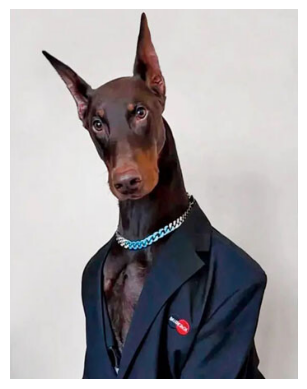

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1위: Doberman(32.32%)
2위: Italian_greyhound(23.85%)
3위: Great_Dane(21.73%)
4위: Weimaraner(9.59%)
5위: Mexican_hairless(4.06%)


In [82]:
predict('../data/dog2.png')